In [56]:
import os
import h5py

import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


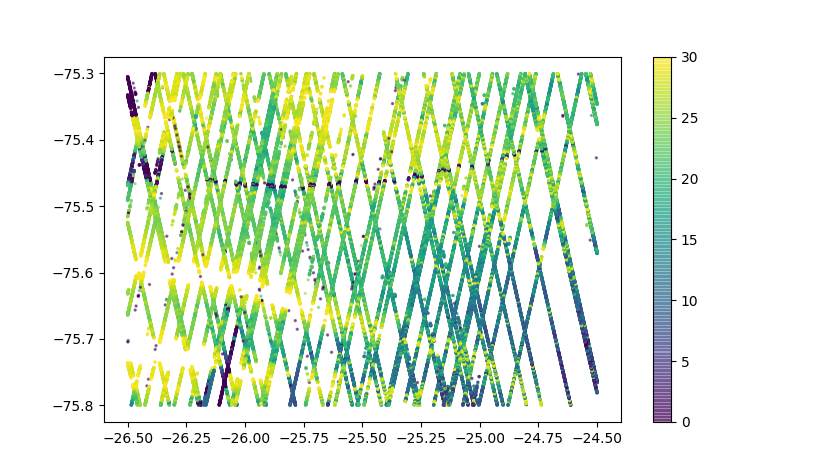

processed_ATL06_20190116000934_02830210_003_01.h5
processed_ATL06_20190205121557_05960212_003_01.h5
processed_ATL06_20181213145516_11600112_003_01.h5
processed_ATL06_20181218013336_12280110_003_01.h5
processed_ATL06_20190515073853_07180312_003_01.h5
processed_ATL06_20190115132257_02760212_003_01.h5
processed_ATL06_20190420194112_03440310_003_01.h5
processed_ATL06_20190306105157_10380212_003_01.h5
Key Error
Key Error
processed_ATL06_20190605063131_10380312_003_01.h5
Key Error
Key Error
processed_ATL06_20190613170129_11670310_003_01.h5
Key Error
processed_ATL06_20190314103516_11600212_003_01.h5
processed_ATL06_20181017042950_02830110_003_01.h5
processed_ATL06_20181016174312_02760112_003_01.h5
processed_ATL06_20181217144658_12210112_003_01.h5
processed_ATL06_20190408091936_01540312_003_01.h5
Key Error
processed_ATL06_20181123024916_08470110_003_01.h5
Key Error
Key Error
processed_ATL06_20181222012517_12890110_003_01.h5
processed_ATL06_20190416090254_02760312_003_01.h5
Key Error
processed_

In [71]:
ddir = '/Users/lipovsky/is2-data'
hmax = 30

file_list = os.listdir(ddir)
files = [f for f in file_list if f.endswith('.h5')]

fig, ax = plt.subplots()

#-- Loop through files, read specified file, and save histogram as numpy array
for f in files:
    # f = files[0]
    print(f)

    #-- read specified file
    FILE_NAME = os.path.join(ddir,f)
    fid = h5py.File(FILE_NAME, mode='r')

    #-- determine which beam is the strong beam (left or right)
    if fid['gt1l'].attrs['atlas_beam_type'] == 'strong':
        strong_id = 'l'
    else:
        strong_id = 'r'


    #-- loop all three beam pairs and save all three
    for i in range(1,4):
        try:
            h_li = fid['gt%i%s/land_ice_segments/h_li'%(i,strong_id)][:]
            h_lat = fid['gt%i%s/land_ice_segments/latitude'%(i,strong_id)][:]
            h_lon = fid['gt%i%s/land_ice_segments/longitude'%(i,strong_id)][:]

            # epsg 4326 epsg 3031
            
            sc = plt.scatter(h_lon[h_li<hmax],h_lat[h_li<hmax],s=2,
                             alpha=0.5,c=h_li[h_li<hmax],vmin=0, vmax=hmax)
        except KeyError:
            print('Key Error')

# fid.close()
cbar = fig.colorbar(sc)